# Requirements

In [ ]:
%matplotlib inline
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from numpy import angle, real
from numpy import exp, abs, pi, sqrt
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage

from google.colab.patches import cv2_imshow

# Basic Video Processing 

In [ ]:
# cap = cv2.VideoCapture('bill.avi')
cap =  cv2.VideoCapture('mydog.avi') # upload own video

# you can also read ay other viddos. 

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()
    
    if ret is False:
        break

    frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # convert BGR (cv2 default) to RBG)  
    #frames.append(frame)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, height, width, channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]

frames size: (326, 494, 396, 3) # (nb_frames, height, width, channel)


## Display space-time slice of the video.

Import a short video, and create a 2D plot where Y axis is $t$ and X-axis is $n$, which is the horizontal cross section of the movie.

At each frame, take a vector of pixels at a fixed y-position and show an image of nFrames*nhorizontal pixels as a final image. 



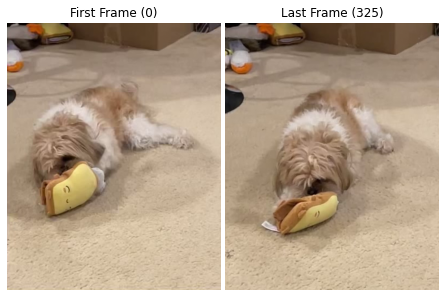

In [ ]:
plt.subplot(121), plt.imshow(frames[0])
plt.axis("off")
plt.title("First Frame (0)")
plt.subplot(122), plt.imshow(frames[325])
plt.axis("off")
plt.title("Last Frame (325)")

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0,
                    right=1)

plt.show()

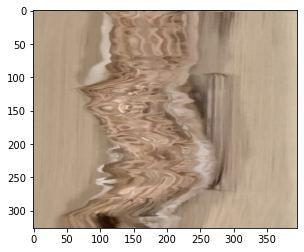

In [ ]:
t,x,y=frames.shape[:3] # time, x-axis, y-axis
img=np.zeros((t,y,3))
x_pixel = int(x/2) # try different pixel
for i in range(t):
  img[t-i-1]=frames[i][x_pixel]

plt.imshow(img)

## Create a space-temporal Gaussian filter.

Gaussian temporal filtering (applied on a sequence of images) will blur the sequence evolution, smoothing out the temporal variation, like a rapid variation in illumination or movement of an object. It's a gaussian filtering of the signal obtained by the temporal evolution of each single pixel.

In [ ]:
def gausssian_temporal_filter(time,sigma_x,sigma_t,size,vx,vy):
  sigma_x = 1
  sigma_t = 4

  gausssian_filter=[]
  for t in range(-(time//2),time//2,1):

    x = np.arange(-(size//2), size//2, 1)
    y = np.arange(-(size//2), size//2, 1)
    xx, yy = np.meshgrid(x, y)

    exp_xy = np.exp(-((xx -vx*t) ** 2 + (yy-vy*t) ** 2) / (2 * sigma_x ** 2))
    exp_t = np.exp(-(t**2)/(2 * (sigma_t)**2))
    g_filter = exp_xy*exp_t / ( ((2*np.pi)**(3/2)) * ((sigma_x)**2) * sigma_t) # g(x, y, t; sigma_x, sigma_t)

    gausssian_filter.append(g_filter)

  img=[]
  center = size//2
  for i in range(time-1, -1,-1):
    try:
      img.append(gausssian_filter[i][center])
    except:
      print(i)

  return img

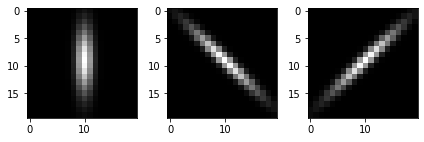

In [ ]:
plt.subplot(131)
plt.imshow(gausssian_temporal_filter(time=20,sigma_x=1,sigma_t=4,size=20,vx=0,vy=0),cmap='gray')
plt.subplot(132)
plt.imshow(gausssian_temporal_filter(time=20,sigma_x=1,sigma_t=4,size=20,vx=-1,vy=0),cmap='gray')
plt.subplot(133)
plt.imshow(gausssian_temporal_filter(time=20,sigma_x=1,sigma_t=4,size=20,vx=1,vy=0),cmap='gray')
plt.tight_layout()

# Motion Magnification.

## 2.a

In [ ]:
def imshow(im, cmap='gray'):
    # clip image from 0-1
    im = np.clip(im, 0, 1)
    plt.imshow(im, cmap=cmap)

In [ ]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4;

# horizontal movement from (0, 0) to (0, 1)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1

ff1 = fftshift(fft2(im1))
ff2 = fftshift(fft2(im2))

im1 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
im2 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


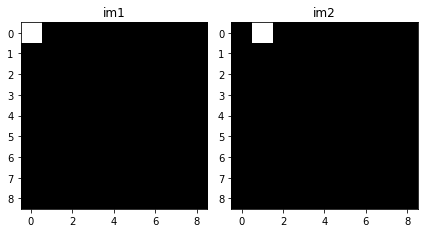

In [ ]:
print("im1", "\n", im1)
print("im2", "\n", im2)

plt.subplot(121)
plt.imshow(im1,cmap='gray')
plt.title("im1")
plt.subplot(122)
plt.imshow(im2,cmap='gray')
plt.title("im2")
plt.tight_layout()

### Magnify Change

Fill out code here:

    phaseShift = angle(im2Dft) - angle(im1Dft)
    
    magnifiedDft = abs(im1Dft) * exp( (angle(im1Dft) + magnificationFactor*phaseShift) * 1j )

In [ ]:
def magnifyChange(im1, im2, magnificationFactor):
    
    # find phase shift in frequency domain
    im1Dft = fft2(im1)
    im2Dft = fft2(im2)
    phaseShift = angle(im2Dft) - angle(im1Dft)
    
    # magnify the phase change in frequency domain
    magnifiedDft = abs(im1Dft) * exp( (angle(im1Dft) + magnificationFactor*phaseShift) * 1j )
    
    # what does the magnified phase change cause in image space?
    magnified = ifft2(magnifiedDft).real
    
    return magnified

If you're not familiar with complex number in python, here's a quickstart.

In [ ]:
# create a complex number
x = 1 + 1j
print("x =", x)
print("x.real", x.real, "x.imag", x.imag)

# magnitude and phase of complex number
mag = abs(x)
phase = angle(x)

print("Magnitude", mag)
print("Phase", phase)

# Euler's formula
y = mag * exp(phase * 1j)
print("y =", y)

x = (1+1j)
x.real 1.0 x.imag 1.0
Magnitude 1.4142135623730951
Phase 0.7853981633974483
y = (1.0000000000000002+1j)


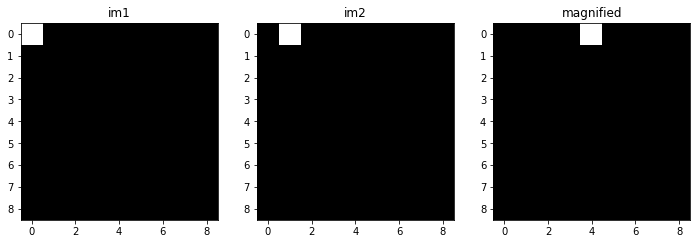

In [ ]:
# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor);

plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');

## 2.b

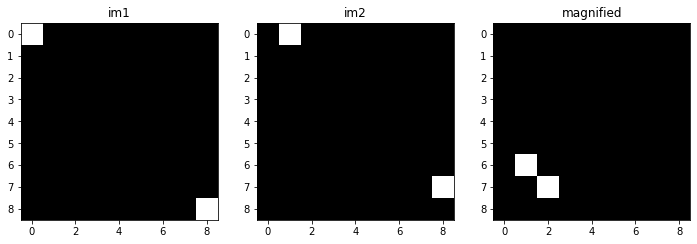

In [ ]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# horizontal movement from (0, 0) to (0, 1)
# additional vertical movement from (8, 8) to (7, 8)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1

# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor)


plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');

## 2.c

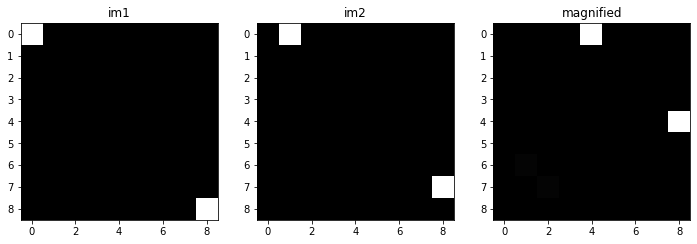

In [ ]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# width of our Gaussian window
sigma = 2

# horizontal movement from (0, 0) to (0, 1)
# additional vertical movement from (8, 8) to (7, 8)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1

# we will magnify windows of the image and aggregate the results
magnified = np.zeros([imSize, imSize])

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(imSize), np.arange(imSize))

for y in range(0, imSize, 2*sigma):
    for x in range(0, imSize, 2*sigma):
        gaussianMask = exp( (-(X-x)**2 - (Y-y)**2)/(2*sigma**2))
        # im1_g = im1 * gaussianMask
        # im2_g = im2 * gaussianMask 
        windowMagnified = magnifyChange(im1 * gaussianMask, im2 * gaussianMask, magnificationFactor)
        magnified = magnified + windowMagnified
        
plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');

## 2.d and 2.f (mydog.avi)

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('mydog.avi')

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()
    
    if ret is False:
        break
        
    # frames.append(frame)
    frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # convert BGR (cv2 default) to RBG)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, width, height channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]

frames size: (326, 494, 396, 3) # (nb_frames, width, height channel)


### Motion magnification

In [ ]:
# 10x magnification of motion
magnificationFactor = 10

# width of Gaussian window
sigma = 13

# alpha for moving average
alpha = 0.5

# we will magnify windows of the video and aggregate the results
magnified = np.zeros_like(frames)

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# iterate over windows of the frames
xRange = list(range(0, width, 2*sigma))
yRange = list(range(0, height, 2*sigma))
numWindows = len(xRange) * len(yRange)
windowIndex = 1

for y in yRange:
    for x in xRange:
        for channelIndex in range(3): # RGB channels
            for frameIndex in range(numFrames):
                
                # create windowed frames
                gaussianMask = exp(( -(X-x)**2 - (Y-y)**2)/(2*sigma**2))
                windowedFrames = gaussianMask * frames[frameIndex,:,:,channelIndex]
            
                # initialize moving average of phase for current window/channel
                if frameIndex == 0:
                    windowAveragePhase = angle(fft2(windowedFrames))
                
                windowDft = fft2(windowedFrames)
                
                # compute phase shift and constrain to [-pi, pi] since
                # angle space wraps around
                windowPhaseShift = angle(windowDft) - windowAveragePhase
                windowPhaseShift[windowPhaseShift > pi] = windowPhaseShift[windowPhaseShift > pi] - 2 * pi
                windowPhaseShift[windowPhaseShift < -pi] = windowPhaseShift[windowPhaseShift < -pi] + 2 * pi
                
                # magnify phase shift
                windowMagnifiedPhase = windowPhaseShift * magnificationFactor
                 
                # go back to image space
                windowMagnifiedDft = abs(windowDft)*exp((angle(windowDft)+windowMagnifiedPhase)*1j)
                windowMagnified = abs(ifft2(windowMagnifiedDft))
                
                # update moving average
                windowPhaseUnwrapped = windowAveragePhase + windowPhaseShift
                windowAveragePhase = alpha * windowAveragePhase + (1 - alpha) * windowPhaseUnwrapped
                
                # aggregate
                magnified[frameIndex,:,:,channelIndex] = magnified[frameIndex,:,:,channelIndex] + windowMagnified
        
        # print progress
        print('{}/{}'.format(windowIndex, numWindows), end='\r')
        windowIndex += 1

In [ ]:
outputs = magnified / np.max(magnified)
for channelIndex in range(3):
    originalFrame = frames[0,:,:,channelIndex]
    magnifiedFrame = outputs[0,:,:,channelIndex]
    scale = np.std(originalFrame[:]) / np.std(magnifiedFrame[:])
    originalMean = np.mean(originalFrame[:])
    magnifiedMean = np.mean(magnifiedFrame[:])
    outputs[:,:,:,channelIndex] = magnifiedMean + scale * (outputs[:,:,:,channelIndex] - magnifiedMean)

outputs = np.clip(outputs, 0, 1)

In [ ]:
print(outputs.shape)

(326, 494, 396, 3)


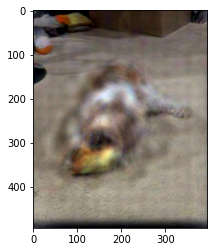

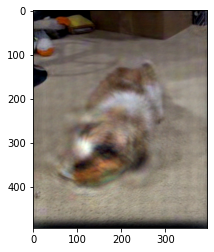

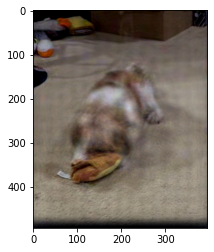

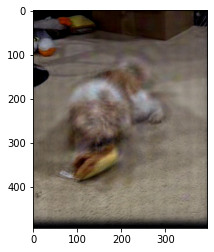

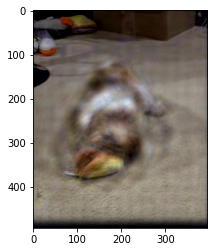

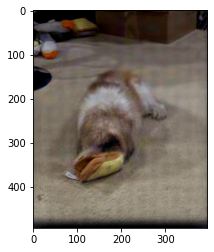

In [ ]:
for i in range(1,7):
  plt.imshow(outputs[i*49])
  plt.show()

In [ ]:
# create output video
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('dog_magnified.avi',fourcc, 30.0, (width, height)) # change from height, width to width, height

for i in range(frames.shape[0]):
    # scale the frame back to 0-255
    frame = cv2.cvtColor((np.clip(outputs[i], 0, 1) * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    
    # write frame to output video
    out.write(frame)

out.release()

In [ ]:
# Only for colab downloading videos
try:
    from google.colab import files
    files.download('guitar_magnified.avi')
except:
    print("Only for google colab")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>